In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic_train.csv')

pd.set_option('display.max_columns',100)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(df.shape)
print('\n')
print(df.columns)
print('\n')
print(df.info())
#df['Survived']=df['Survived'].astype('bool')
print('\n')
print(df.info())
print('\n')
df.sort_values(by="Age",ascending=True).head()

(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [3]:
df=df.astype('str')
df.apply(np.max)
print('\n')
d={'0' : False, '1' : True}
df["Survived"]=df["Survived"].map(d)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,nan,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,nan,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,nan,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(183, 12)




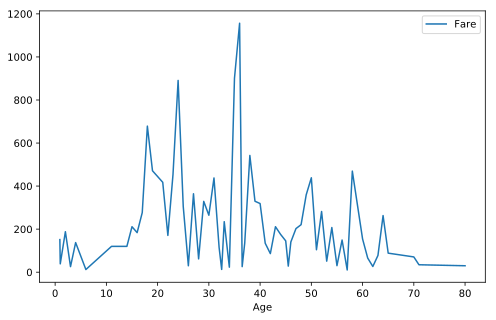

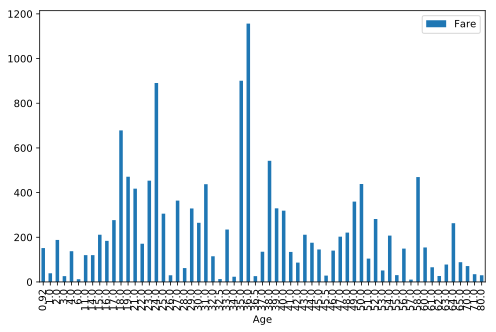

In [4]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

from pylab import rcParams
rcParams['figure.figsize']=8,5

df=pd.read_csv('titanic_train.csv')
#df['Survived']=df['Survived'].astype('bool')
df.info()

df=df.dropna()
print('\n')
print(df.shape)
print('\n')

test=df[['Age']+['Fare']]
test.groupby('Age').sum().plot()
test.groupby('Age').sum().plot(kind='bar',rot=90)

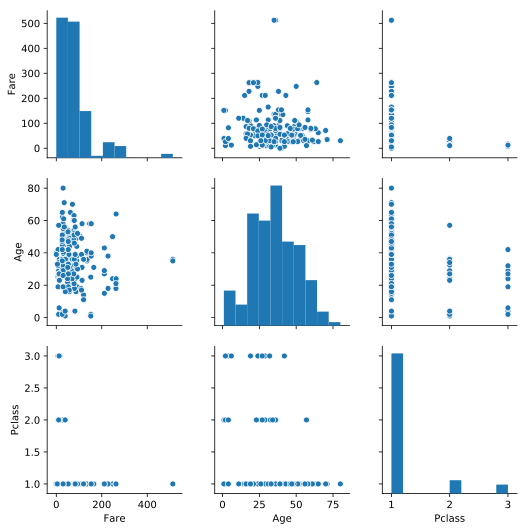

In [5]:
cols=['Fare','Age','Pclass']
#df["Sex"]=df["Sex"].map({'male': 1, 'female': 0})
sns_plot=sns.pairplot(df[cols])

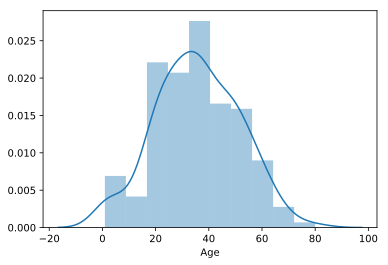

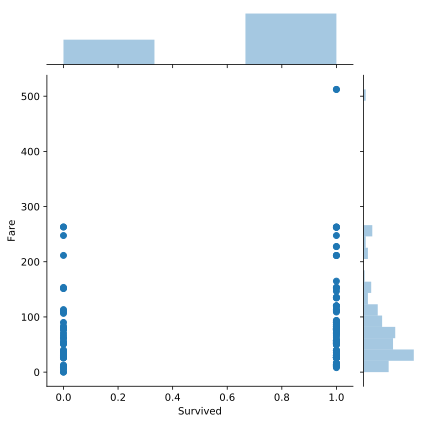

In [6]:
sns.distplot(df.Age)
sns.jointplot(df.Survived,df.Fare)

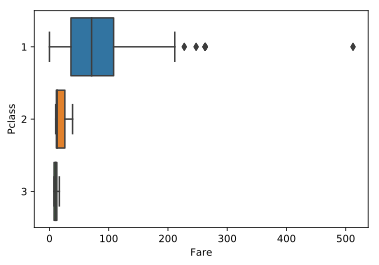

In [7]:
Pclass=df.Pclass.value_counts().sort_values(ascending=False).head(3).index.values
sns.boxplot(y='Pclass',x='Fare',data=df[df.Pclass.isin(Pclass)],orient='h')

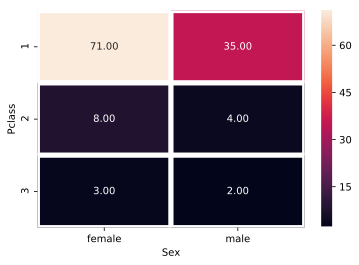

In [8]:
df['Pclass']=df['Pclass'].astype('str')
df['Sex']=df['Sex'].astype('str')
pclass_sex_survived=df.pivot_table(index='Pclass',columns='Sex',values='Survived',aggfunc=sum).fillna(0).applymap(float)
#print(pclass_sex_survived)
sns.heatmap(pclass_sex_survived,annot=True,fmt='.2f',linewidth=5)

In [9]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)


age_df=df.groupby('Age')[['Survived']].sum()


age_df.columns=['Survived']


trace0=go.Scatter(
   x=age_df.index,
   y=age_df.Survived,
   name='Age_Survived')


data=[trace0]
layout={'title':"Statistics of survived"}

fig=go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [10]:
df=pd.read_csv('titanic_train.csv')
pclass_df=df.groupby('Pclass')[['Survived']].sum()

pclass_df.columns=['Survived']
pclass_df.sort_values('Survived',ascending=False, inplace=True)

trace0=go.Bar(
    x=pclass_df.index,
    y=pclass_df.Survived,
    name='Pclass survived')

data=[trace0]
layout={'xaxis':{'title':'Pclass'}}

fig=go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [11]:
data=[]
for sex in df.Sex.unique():
    data.append(
        go.Box(y=df[df.Sex==sex].Age, name=sex)
    )

iplot(data, show_link=False)